### 手書き数字認識　
#### 　　フラットに展開しNN　(ニュ－ラルネットワーク）    

In [1]:
#　手書き数字認識　ディープラーニング

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers
from keras.utils import plot_model
from keras.models import model_from_json,load_model
from keras.models import Sequential, load_model

import time
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### 用意したファイルを読み込む

In [2]:
# フラットに展開したデータを読み込む

X_train=np.load('DATA/X_train.npy')
X_test=np.load('DATA/X_test.npy')
y_train=np.load('DATA/y_train.npy')
y_test=np.load('DATA/y_test.npy')

Xtrain=np.load('DATA/Xtrain.npy')
ytrain=np.load('DATA/ytrain.npy')
Xtest=np.load('DATA/Xtest.npy')
ytest=np.load('DATA/ytest.npy')


print('X_train.shape  :',X_train.shape)
print('y_train.shape :',y_train.shape)
print('X_test.shape   :',X_test.shape)
print('y_test.shape  :',y_test.shape)
print(' ')
print('Xtrain.shape   :',Xtrain.shape)
print('ytrain.shape  :',ytrain.shape)
print('Xtest.shape   :',Xtest.shape)
print('ytest.shape  :',ytest.shape)

X_train.shape  : (60000, 784)
y_train.shape : (60000, 10)
X_test.shape   : (10000, 784)
y_test.shape  : (10000, 10)
 
Xtrain.shape   : (60000, 28, 28)
ytrain.shape  : (60000,)
Xtest.shape   : (10000, 28, 28)
ytest.shape  : (10000,)


#### ＮＮモデルの作成
    入力データは、28x28サイズの画像データを1行に並べたものを使用
    第一段は、入力データを　300点のノードに　活性化関数は　 'relu' 
    第二段は　30点　dropoutを付与
    最終段は、出力0-9の値　'softmax'関数で出力
    
#### コンパイル
    モデルに、学習アルゴリズム、評価関数等を指定しコンパイルする。
    
#### 学習
    以下の値を入れ学習をスタートさせる
        学習データ、正解値データ　　
        エポック数（まとまった学習単位）の数　　エポックの切れ目で色々な事が出来る。
        バッチサイズ（１回の学習に使うサンプル数）
        バッチ数（１エポック中のバッチ数）
        
#### テスト
    学習させたモデルを使い　テストデータを入力し　性能を確認する
 

In [3]:
#　NNのモデル作成

model = models.Sequential()
model.add(layers.Dense(300 , activation = 'relu' , input_shape=(28*28,)))
model.add(layers.Dense(30 , activation = 'relu' ))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))

# モデルの表示
#plot_model(model,show_shapes=True, to_file='model.png' )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                9030      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 244,840
Trainable params: 244,840
Non-trainable params: 0
_________________________________________________________________


In [4]:
# コンパイル

model.compile(optimizer='Adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [5]:
%%time

#　60000件の教師データを学習
#　128個のバッチ学習　
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs =100, batch_size=128 ,validation_data=(X_test, y_test)  )


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 110us/step - loss: 0.6234 - acc: 0.8110 - val_loss: 0.1637 - val_acc: 0.9520
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.2882 - acc: 0.9174 - val_loss: 0.1173 - val_acc: 0.9661
Epoch 3/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.2132 - acc: 0.9389 - val_loss: 0.1028 - val_acc: 0.9699
Epoch 4/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1731 - acc: 0.9496 - val_loss: 0.0873 - val_acc: 0.9745
Epoch 5/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.1473 - acc: 0.9563 - val_loss: 0.0833 - val_acc: 0.9761
Epoch 6/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1290 - acc: 0.9614 - val_loss: 0.0866 - val_acc: 0.9749
Epoch 7/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1148 - acc: 0.9651 - val_loss: 0.0833 -

In [6]:
#　学習した判別器を使用し　テストデータ10000個をテスト

test_loss, test_acc = model.evaluate(X_test, y_test)

print('test_acc' , test_acc)
print('test_loss' , test_loss)

10000/10000 [==============================] - 0s 44us/step
test_acc 0.9796
test_loss 0.19402968996874903


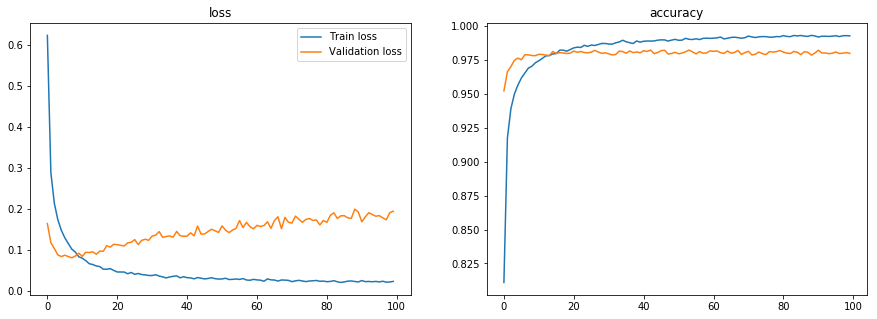

In [11]:
#　訓練時の損失率と正解率をプロット

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('accuracy')
ax[1].plot(history.epoch, history.history["acc"], label="Train accuracy")
ax[1].plot(history.epoch, history.history["val_acc"], label="Val_accuracy")
ax[0].legend()
ax[1].legend()

In [15]:
# モデルの保存

model_name='model/MODEL_C02_NN_0529_01'

model.save(model_name + '.hdf5')

model.save_weights(model_name + '_weight.hdf5')
#save as JSON
json_string = model.to_json()
open(model_name + '.json','w').write(json_string)

1711

In [10]:
### 学習済みモデルの読み込み
model_name='model/MODEL_C02_NN_0524'

model2=model_from_json(open(model_name + '.json','r').read())
model2.load_weights(model_name  + '_weight.hdf5')


model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_12 (Dense)             (None, 30)                9030      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
Total params: 244,840
Trainable params: 244,840
Non-trainable params: 0
_________________________________________________________________


#### 不正解データの取り出し
    予測値　予測＋to_categoricaの逆　（onehot⇒0-9の値）
    正解値　
    不正解の　id、予測値　正解値　を　データフレームに
       ３つのデータをarrayに
       assin()メソッドで　データフレームに追加
    
    Xtrain,ytrain, wosiyou を使用
    

In [16]:
# 不正解データを取り出し　データフレームに改良

y_test_pred=model.predict(X_test)     #　モデルで予測
ytest_pred=np.argsort(-y_test_pred, axis = 1)[:,:1] #　onehotデータを数値順に並べ替え　そのidを返す
ytest_pred=ytest_pred.reshape(-1)

incorrect_id=pd.DataFrame(index=[ ],columns=['inc_id','correct_label','pred_label'])  #　結果を入れるDF

j=0
for i in range(len(ytest)):
    if ytest_pred[i]!=ytest[i]:
        j=j+1
        d=pd.Series([i,ytest[i],ytest_pred[i]],incorrect_id.columns,name=j)
        incorrect_id=incorrect_id.append(d)

print('incorrect_id.shape',incorrect_id.shape)
incorrect_id.head(3)
incorrect_id.tail(3)

incorrect_id.shape (191, 3)


,inc_id,correct_label,pred_label
189,9839,2,3
190,9855,2,3
191,9858,6,8


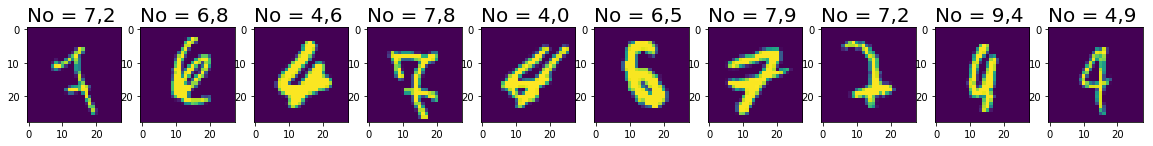

In [17]:
#　不正解データの表示
no=20

fig, ax = plt.subplots(1,10,figsize=(20,5))

for i in range(10):
    image_no=incorrect_id.iloc[i+no][0]
    c=incorrect_id.iloc[i+no][1]
    p=incorrect_id.iloc[i+no][2]
    
    ax[i].imshow(Xtest[image_no] )
    ax[i].set_title('No = {},{} '. format(c,p),fontsize=20)